# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
from scipy.stats import linregress
import time
import requests
import json
import random

from citipy import citipy

from api_keys import weather_api_key

base_url = "http://api.openweathermap.org/data/2.5/weather?q="

## Generate Cities List

In [5]:
coordinates = []
cities = []

longitude = np.random.uniform(-180, 180, size=10)
latitude = np.random.uniform(-90, 90, size=10)

coordinates = zip(latitude, longitude)

for coordinate in coordinates:
    city_coordinates = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city_coordinates not in cities:
        cities.append(city_coordinates)
        
print(len(cities))

10


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
# build the endpoint, read the documentation, figure out the varaibles to pull out, check out weatehr related activities, copy the endpoint and paste it into googlechrome to check if it works and how the json object appears
# don't forget the try and accept to make sure that if a city doesn't show up it doesn't break
# consider a pause at the end sleep.01 or 3
# save the dataframe to a csv right away, keep in mind the data will all change

record_count = 1
set_count = 1

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    
    time.sleep(1.25)
    
    query_url = f"{base_url}{city}&units=imperial&appid={weather_api_key}"

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        print("Processing Record " + str(record_count) + " of Set " + str(set_count) + " | " + city)
        
        record_count = record_count + 1
        set_count = set_count + math.floor((set_count/50))
        
        city_name.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
    except:
        print("The city of " + city + " not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | zaozerne
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | kargasok
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | loreto
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | nianzishan
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weather_df = pd.DataFrame({'City':city_name, 'Latitude':lat, 'Longitude': lng, 'Max Temperature': max_temp,
                          'Humidity':humidity, 'Cloudiness': clouds, 'Wind Speed': wind_speed, 'Country':country, "Date":date})

weather_df[["Humidity", "Cloudiness"]] = weather_df[["Humidity", "Cloudiness"]].apply(pd.to_numeric)

weather_df.to_csv(r'C:\Users\kylie\OneDrive\Desktop\uofm-stp-data-pt-09-2020-u-c\02-Homework\06-Python-APIs\python-api-challenge\weather_df.csv')

weather_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacific Grove,36.62,-121.92,54.00,100,90,4.32,US,1605342024
1,Zaozyornoye,45.16,33.28,51.31,70,68,11.34,UA,1605342219
2,Cape Town,-33.93,18.42,69.01,55,75,14.99,ZA,1605342026
3,Kargasok,59.06,80.86,20.26,96,73,6.13,RU,1605342221
4,Bluff,-46.60,168.33,59.00,84,100,1.99,NZ,1605342223
5,Nikolskoye,59.70,30.79,34.00,86,90,6.71,RU,1605342224
6,Loreto,22.27,-101.97,53.98,55,0,2.42,MX,1605342226
7,East London,-33.02,27.91,77.00,53,0,8.05,ZA,1605342227
8,Ushuaia,-54.80,-68.30,35.60,93,75,29.97,AR,1605342048
9,Nianzishan,47.52,122.88,38.59,64,0,3.51,CN,1605342230


In [29]:
weather_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,1.000000e+01
mean,10.198000,19.028000,49.27500,75.600000,57.100000,8.943000,1.605342e+09
std,46.622479,93.958194,17.24882,18.313322,40.550243,8.432257,9.282337e+01
min,-54.800000,-121.920000,20.26000,53.000000,0.000000,1.990000,1.605342e+09
25%,-33.702500,-46.620000,36.34750,57.250000,17.000000,3.712500,1.605342e+09
50%,29.445000,29.350000,52.64500,77.000000,74.000000,6.420000,1.605342e+09
75%,46.930000,68.965000,57.75000,91.250000,86.250000,10.517500,1.605342e+09
max,59.700000,168.330000,77.00000,100.000000,100.000000,29.970000,1.605342e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
high_humidity

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [35]:
#  Get the indices of cities that have humidity over 100%.


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

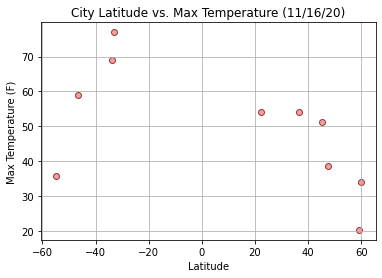

In [64]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], color="lightcoral", edgecolor="maroon", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

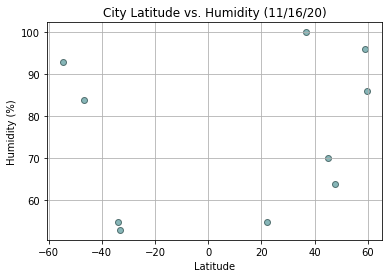

In [31]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], color="cadetblue", edgecolor="darkslategray", alpha=0.75)
plt.title("City Latitude vs. Humidity (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("City Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

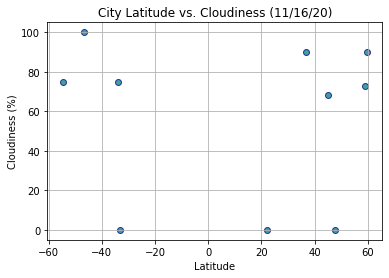

In [32]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], color="teal", edgecolor="darkblue", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

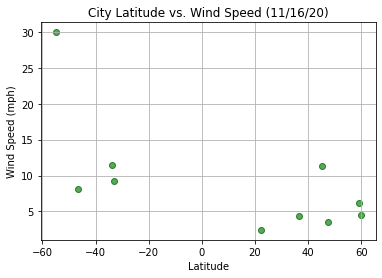

In [25]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], color="forestgreen", edgecolor="darkgreen", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [42]:
# Dataframe for Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_df = weather_df.loc[weather_df["Latitude"] >= 0]

# Dataframe for Southern Hemisphere (less than 0 degrees latitude)
south_df = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8334088992855847


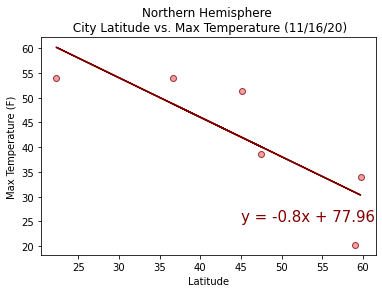

In [78]:
plt.scatter(north_df["Latitude"], north_df["Max Temperature"], color="lightcoral", edgecolor="maroon", alpha=0.75)

x_values = north_df["Latitude"]
y_values = north_df["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="maroon")
plt.annotate(line_eq,(45,25),fontsize=15,color="maroon")

plt.title("Northern Hemisphere \n City Latitude vs. Max Temperature (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

print("The r value is: " + str(rvalue))
plt.savefig("Northern Hemisphere City Latitude vs Max Temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.9592813409667392


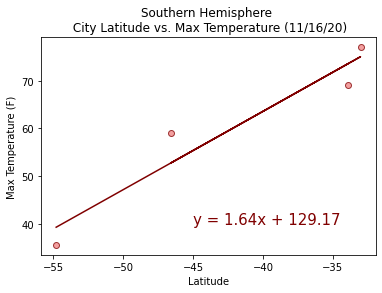

In [79]:
plt.scatter(south_df["Latitude"], south_df["Max Temperature"], color="lightcoral", edgecolor="maroon", alpha=0.75)

x_values = south_df["Latitude"]
y_values = south_df["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="maroon")
plt.annotate(line_eq,(-45,40),fontsize=15,color="maroon")

plt.title("Southern Hemisphere \n City Latitude vs. Max Temperature (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

print("The r value is: " + str(rvalue))
plt.savefig("Southern Hemisphere City Latitude vs Max Temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.520131032604124


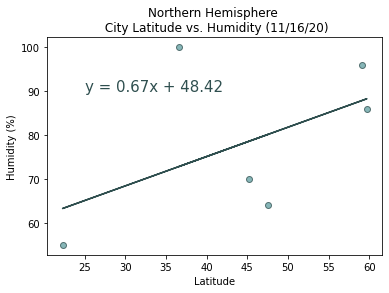

In [80]:
plt.scatter(north_df["Latitude"], north_df["Humidity"], color="cadetblue", edgecolor="darkslategray", alpha=0.75)

x_values = north_df["Latitude"]
y_values = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="darkslategray")
plt.annotate(line_eq,(25,90),fontsize=15,color="darkslategray")

plt.title("Northern Hemisphere \n City Latitude vs. Humidity (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print("The r value is: " + str(rvalue))
plt.savefig("Northern Hemisphere City Latitude vs Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.9898958991948005


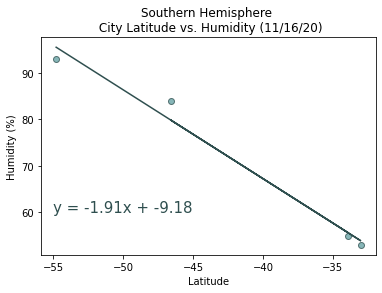

In [81]:
plt.scatter(south_df["Latitude"], south_df["Humidity"], color="cadetblue", edgecolor="darkslategray", alpha=0.75)

x_values = south_df["Latitude"]
y_values = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="darkslategray")
plt.annotate(line_eq,(-55,60),fontsize=15,color="darkslategray")

plt.title("Southern Hemisphere \n City Latitude vs. Humidity (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print("The r value is: " + str(rvalue))
plt.savefig("Southern Hemisphere City Latitude vs Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.5282245064261125


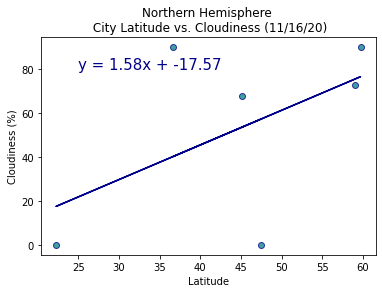

In [82]:
plt.scatter(north_df["Latitude"], north_df["Cloudiness"], color="teal", edgecolor="darkblue", alpha=0.75)

x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="darkblue")
plt.annotate(line_eq,(25,80),fontsize=15,color="darkblue")

plt.title("Northern Hemisphere \n City Latitude vs. Cloudiness (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print("The r value is: " + str(rvalue))
plt.savefig("Northern Hemisphere City Latitude vs Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.5813043811446164


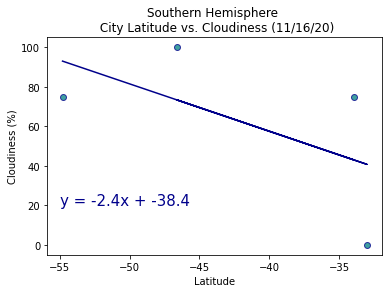

In [83]:
plt.scatter(south_df["Latitude"], south_df["Cloudiness"], color="teal", edgecolor="darkblue", alpha=0.75)

x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="darkblue")
plt.annotate(line_eq,(-55,20),fontsize=15,color="darkblue")

plt.title("Southern Hemisphere \n City Latitude vs. Cloudiness (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print("The r value is: " + str(rvalue))
plt.savefig("Southern Hemisphere City Latitude vs Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.4541669674453238


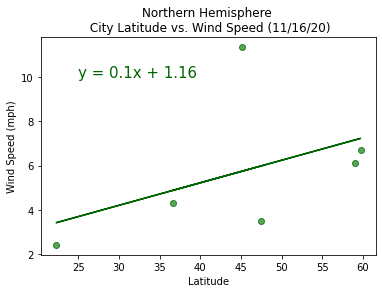

In [85]:
plt.scatter(north_df["Latitude"], north_df["Wind Speed"], color="forestgreen", edgecolor="darkgreen", alpha=0.75)

x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="darkgreen")
plt.annotate(line_eq,(25,10),fontsize=15,color="darkgreen")

plt.title("Northern Hemisphere \n City Latitude vs. Wind Speed (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print("The r value is: " + str(rvalue))
plt.savefig("Northern Hemisphere City Latitude vs Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.513066084504534


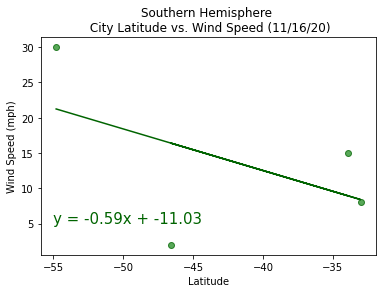

In [87]:
plt.scatter(south_df["Latitude"], south_df["Wind Speed"], color="forestgreen", edgecolor="darkgreen", alpha=0.75)

x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color="darkgreen")
plt.annotate(line_eq,(-55,5),fontsize=15,color="darkgreen")

plt.title("Southern Hemisphere \n City Latitude vs. Wind Speed (11/16/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print("The r value is: " + str(rvalue))
plt.savefig("Southern Hemisphere City Latitude vs Wind Speed.png")
plt.show()